In [1]:
!pip install tensorflow keras sklearn matplotlib pandas pil

ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
import os

In [4]:
os.getcwd()


'C:\\Users\\Shubham Sharma'

In [5]:
cd/Users/Shubham Sharma/traffic project files/Train

C:\Users\Shubham Sharma\traffic project files\Train


In [6]:
os.getcwd()

'C:\\Users\\Shubham Sharma\\traffic project files\\Train'

In [7]:
class NotADirectoryError(Exception):
    pass

In [8]:
# from my.exception.module import NotADirectoryError

In [9]:
# # loading dataset
# data = []
# labels = []
# classes = 43
# cur_path = os.getcwd()

# for i in os.listdir(cur_path):
#     dir = cur_path + '/' + i
# #     print(i)
# #     print(dir)
#     for j in os.listdir(dir):
# #         print(j)
#         img_path = dir+'/'+j
# #         print(img_path)
#         img = cv2.imread(img_path,-1)
#         img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
#         data.append(img)
#         labels.append(i)
        
# data = np.array(data)
# labels = np.array(labels)
# print(data.shape, labels.shape)
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '\\' + i
    for j in os.listdir(dir):
        img_path = dir+'\\'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
y_train.shape, y_test.shape


((31367, 43), (7842, 43))

In [13]:
train_data=pd.read_csv('C:\\Users\\Shubham Sharma\\traffic project files\\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\\Shubham Sharma\\traffic project files\\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()


,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [14]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [15]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [16]:
cd/Users/Shubham Sharma/traffic project files

C:\Users\Shubham Sharma\traffic project files


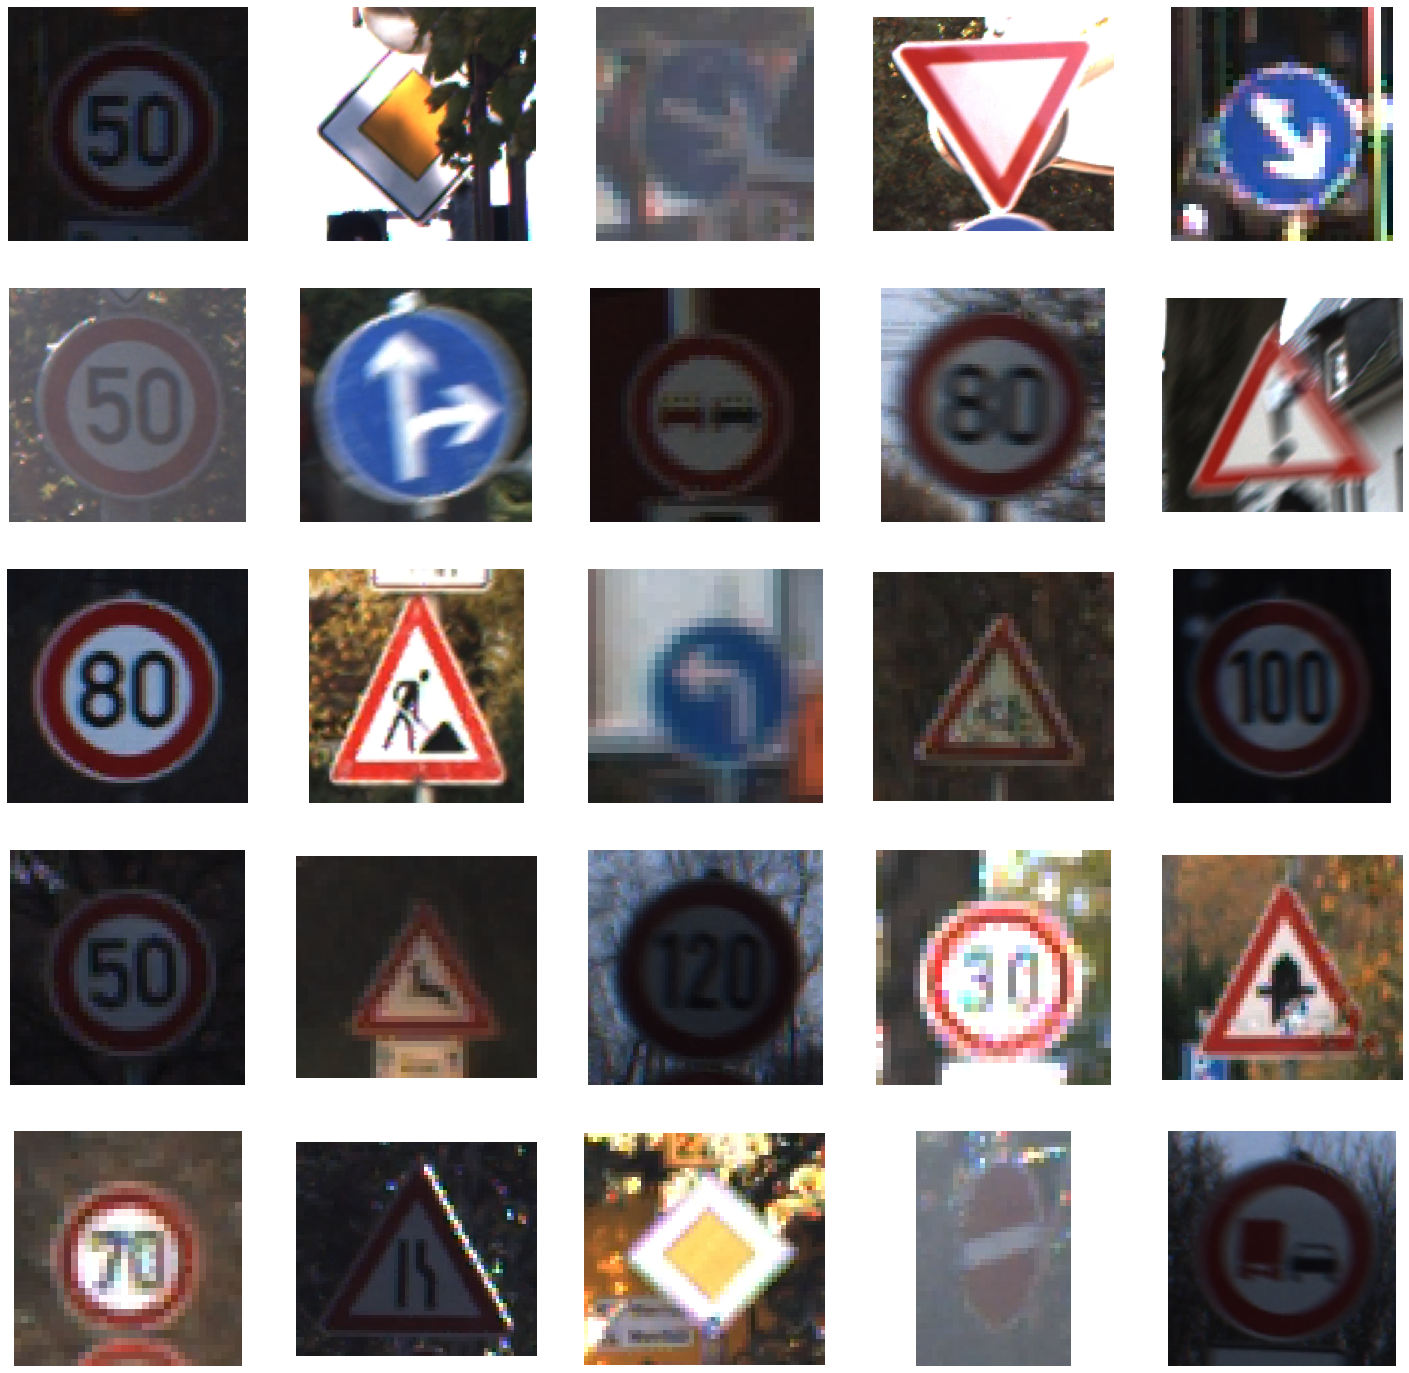

In [17]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    

In [18]:
cd/Users/Shubham Sharma/traffic project files/Train

C:\Users\Shubham Sharma\traffic project files\Train


Text(0, 0.5, 'Number of images')

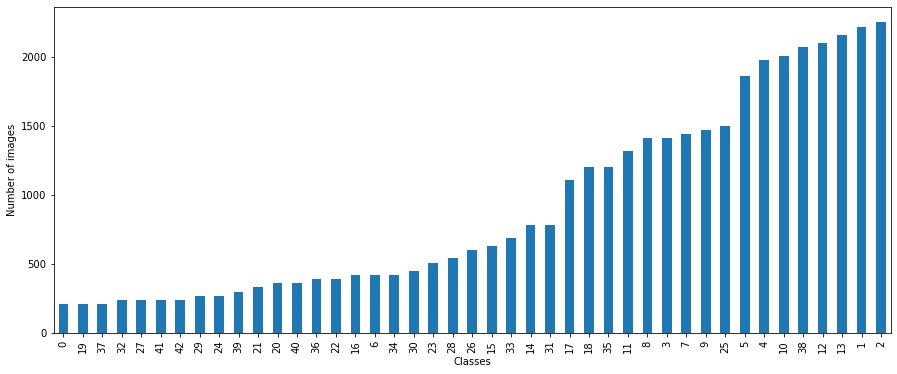

In [19]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [20]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [22]:
!pip install visualkeras
import visualkeras

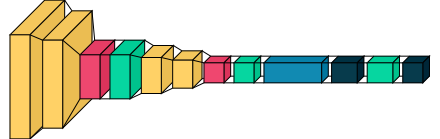

In [23]:
visualkeras.layered_view(model)

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 56s 111ms/step - loss: 2.3109 - accuracy: 0.4449 - val_loss: 0.5105 - val_accuracy: 0.8828
Epoch 2/20
491/491 [==============================] - 57s 116ms/step - loss: 0.6632 - accuracy: 0.8100 - val_loss: 0.2343 - val_accuracy: 0.9436
Epoch 3/20
491/491 [==============================] - 58s 118ms/step - loss: 0.4015 - accuracy: 0.8846 - val_loss: 0.1163 - val_accuracy: 0.9741
Epoch 4/20
491/491 [==============================] - 58s 119ms/step - loss: 0.2914 - accuracy: 0.9153 - val_loss: 0.0747 - val_accuracy: 0.9832
Epoch 5/20
491/491 [==============================] - 57s 115ms/step - loss: 0.2343 - accuracy: 0.9347 - val_loss: 0.0596 - val_accuracy: 0.9856
Epoch 6/20
491/491 [==============================] - 52s 107ms/step - loss: 0.2304 - accuracy: 0.9360 - val_loss: 0.0672 - val_accuracy: 0.9823
Epoch 7/20
491/491 [==============================] - 50s 102ms/step - loss: 0.1916 - accuracy: 0.9458 - val_loss: 0.0570 - val_ac

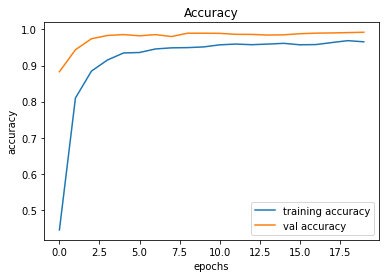

In [25]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

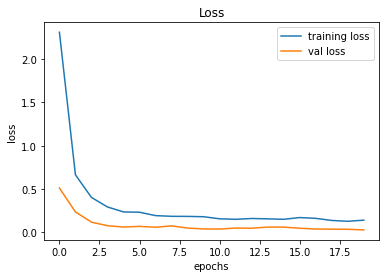

In [26]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
#evaluation
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.026212070137262344
Test accuracy 0.9920938611030579


In [28]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 12ms/step


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.98      1.00      0.99       496
           2       0.99      0.99      0.99       420
           3       1.00      0.97      0.98       294
           4       0.99      0.99      0.99       400
           5       0.97      0.98      0.98       364
           6       1.00      1.00      1.00        69
           7       1.00      0.99      0.99       313
           8       0.99      0.99      0.99       274
           9       0.99      1.00      0.99       277
          10       1.00      1.00      1.00       398
          11       0.99      1.00      1.00       261
          12       1.00      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      0.98      0.99       135
          15       1.00      0.99      1.00       118
          16       1.00      1.00      1.00        86
          17       0.99    

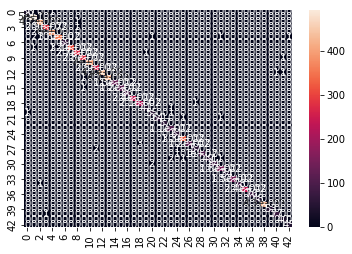

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [31]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9920938536087732

In [32]:
model.save('traffic_classifier.h5')

# build simple app using tkinter

In [33]:
import tkinter as tk


In [34]:
from tkinter import filedialog

In [35]:
from tkinter import *
from PIL import ImageTk, Image


In [36]:
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [37]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }


In [38]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

In [39]:
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)

    image = numpy.array(image)
#     pred= np.argmax(model.predict([image])[0], axis=-1) 
    pred = model.predict([image])[0]
    print(pred)
    ind=-1
    max=0
    for i in range(len(pred)):
        if(pred[i]>max):
            max=pred[i]
            ind=i
        
    sign = classes[ind+1]
    print(sign)
    
    label.configure(foreground='#011638', text=sign) 

In [40]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

In [41]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass


In [42]:
upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

In [43]:
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)

In [ ]:
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 78ms/step
[5.24255388e-19 1.00000000e+00 5.79005973e-13 2.54708166e-22
 5.28651709e-18 9.22036544e-11 2.29461920e-14 1.38316715e-21
 2.25481665e-22 0.00000000e+00 1.57460891e-36 2.44136488e-26
 2.78643255e-28 1.45759432e-26 9.16794580e-23 3.27951004e-31
 0.00000000e+00 4.42632194e-28 3.63850371e-30 0.00000000e+00
 2.47229855e-36 8.47174297e-33 0.00000000e+00 2.13048127e-37
 7.07981947e-38 2.90411610e-20 4.82623379e-37 3.38702217e-31
 0.00000000e+00 2.90325622e-32 1.11985053e-34 1.27731708e-31
 2.94356180e-30 0.00000000e+00 1.06924685e-32 6.06743540e-31
 1.65555342e-37 9.00240195e-36 3.15079150e-26 0.00000000e+00
 4.57553550e-18 0.00000000e+00 1.48412862e-32]
Speed limit (30km/h)
1/1 [==============================] - 0s 19ms/step
[1.0690625e-26 2.8490906e-17 4.2170120e-19 1.2718417e-17 8.5760686e-22
 3.3915743e-23 8.5628645e-29 1.2119070e-24 3.0839713e-20 1.0000000e+00
 5.4048766e-15 7.8595104e-25 2.5328667e-15 1.9768528e-17 7.0132372e-23
 3.43

1/1 [==============================] - 0s 33ms/step
[7.4541683e-34 1.0801328e-10 8.2041830e-12 1.6076055e-20 7.1158192e-22
 2.0519761e-11 1.9573909e-17 5.9505704e-15 2.2553417e-25 5.3881809e-11
 9.9986434e-01 1.1878248e-13 3.3598586e-05 6.0515562e-19 3.0941769e-23
 1.6184075e-16 1.8399614e-19 1.8678855e-15 6.4792001e-22 1.3672975e-25
 9.6501742e-17 2.1134973e-19 4.6669207e-28 1.0894324e-15 1.1556206e-27
 1.5671549e-16 3.9800692e-31 4.2512245e-21 6.9533806e-26 8.3255532e-22
 9.6594735e-21 2.2227119e-20 1.1587128e-23 1.4934571e-16 2.0084384e-25
 2.6887258e-14 5.9588888e-21 1.3016320e-25 2.9169742e-15 2.2258689e-27
 7.4113159e-05 6.4627383e-21 2.7894584e-05]
No passing veh over 3.5 tons
1/1 [==============================] - 0s 28ms/step
[1.7758203e-34 4.3865777e-31 1.3257150e-30 6.4593232e-37 3.0293047e-31
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2361470e-35 9.2169330e-38
 0.0000000e+00 2.8367507e-31 2.8446960e-37 5.6482403e-34 9.2180746e-27
 1.0202958e-29 0.0000000e+00 4.3012328e-35

1/1 [==============================] - 0s 21ms/step
[1.7758203e-34 4.3865777e-31 1.3257150e-30 6.4593232e-37 3.0293047e-31
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2361470e-35 9.2169330e-38
 0.0000000e+00 2.8367507e-31 2.8446960e-37 5.6482403e-34 9.2180746e-27
 1.0202958e-29 0.0000000e+00 4.3012328e-35 1.0000000e+00 0.0000000e+00
 1.6106847e-27 5.8472512e-31 0.0000000e+00 3.6462858e-37 4.5913227e-26
 2.3338426e-28 2.7961087e-15 1.2429826e-23 1.3248164e-28 1.6754699e-31
 0.0000000e+00 0.0000000e+00 4.6175228e-36 5.3659325e-35 8.9843563e-36
 2.3809777e-31 0.0000000e+00 6.4115487e-30 9.1315413e-38 1.1298387e-36
 1.3015649e-33 0.0000000e+00 0.0000000e+00]
General caution
1/1 [==============================] - 0s 33ms/step
[4.3794948e-08 1.1592838e-03 5.2799680e-04 3.2352179e-02 1.7839724e-07
 9.8595619e-03 5.3889242e-05 3.8141758e-07 6.3797379e-05 1.0228898e-04
 1.4488645e-04 1.8239172e-06 3.5628572e-03 5.5028341e-04 2.3978382e-05
 7.4612130e-06 3.7069283e-06 2.9593357e-06 3.9849378e-0